<a href="https://colab.research.google.com/github/atlavijayakumari/Flipkart-Task-4/blob/main/Transportation_Analytics_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
np.random.seed(10)
vehicles=pd.DataFrame({
    "vehicle_id":range(1001, 1021),
    "vehicle_type":np.random.choice(["Truck","Van","MiniTruck"], 20),
    "mileage_km_per_liter":np.random.randint(6, 15, 20)
})
drivers = pd.DataFrame({
    "driver_id": range(2001, 2021),
    "experience_years": np.random.randint(1, 15, 20)
})
trips = pd.DataFrame({
    "vehicle_id": np.random.choice(vehicles["vehicle_id"], 120),
    "driver_id": np.random.choice(drivers["driver_id"], 120),
    "trip_date": pd.date_range("2024-01-01", periods=120),
    "distance_km": np.random.randint(50, 500, 120),
    "route_type": np.random.choice(["City", "Highway", "Rural"], 120),
    "traffic_level": np.random.choice(["Low","Medium","High"],120),
    "delay_minutes": np.random.randint(0, 120, 120)
})
trips["fuel_consumed_liters"]=trips["distance_km"]/np.random.randint(7, 14)
maintenance=pd.DataFrame({
    "vehicle_id":vehicles["vehicle_id"],
    "maintenance_cost":np.random.randint(3000, 20000, 20)
})
print("🚗VEHICLES DATA")
display(vehicles)
print("👨‍✈️DRIVERS DATA")
display(drivers)
print("🛣️TRIPS DATA(with route_type & driver_id)")
display(trips.head(20))
print("🛠️MAINTENANCE DATA")
display(maintenance)

🚗VEHICLES DATA


,vehicle_id,vehicle_type,mileage_km_per_liter
0,1001,Van,10
1,1002,Van,12
2,1003,Truck,14
3,1004,Truck,7
4,1005,Van,14
5,1006,Truck,10
6,1007,Van,7
7,1008,Van,9
8,1009,Truck,12
9,1010,Van,11


👨‍✈️DRIVERS DATA


,driver_id,experience_years
0,2001,1
1,2002,7
2,2003,8
3,2004,9
4,2005,12
5,2006,2
6,2007,8
7,2008,12
8,2009,13
9,2010,2


🛣️TRIPS DATA(with route_type & driver_id)


,vehicle_id,driver_id,trip_date,distance_km,route_type,traffic_level,delay_minutes,fuel_consumed_liters
0,1019,2014,2024-01-01,205,Rural,Low,23,29.285714
1,1013,2019,2024-01-02,415,Highway,Medium,109,59.285714
2,1003,2019,2024-01-03,370,Rural,High,31,52.857143
3,1009,2017,2024-01-04,227,Highway,Medium,65,32.428571
4,1016,2013,2024-01-05,315,City,High,56,45.000000
5,1014,2002,2024-01-06,333,Rural,High,36,47.571429
6,1016,2012,2024-01-07,358,Highway,High,87,51.142857
7,1007,2014,2024-01-08,396,Rural,Medium,4,56.571429
8,1011,2019,2024-01-09,363,Rural,Low,78,51.857143
9,1012,2020,2024-01-10,482,City,Low,99,68.857143


🛠️MAINTENANCE DATA


,vehicle_id,maintenance_cost
0,1001,13499
1,1002,17176
2,1003,19433
3,1004,5547
4,1005,11761
5,1006,3487
6,1007,18477
7,1008,13716
8,1009,17018
9,1010,6069


In [2]:
master =trips.merge(vehicles, on="vehicle_id", how="left")
master=master.merge(drivers, on="driver_id", how="left")
master= master.merge(maintenance, on="vehicle_id", how="left")
master ["fuel_efficiency_km_per_liter"]= master["distance_km"]/master["fuel_consumed_liters"]
master["maintenance_cost_per_km"] =master["maintenance_cost"]/ master["distance_km"]
print ( "📊 MASTER ANALYTICS TABLE")
display (master.head(10))

📊 MASTER ANALYTICS TABLE


,vehicle_id,driver_id,trip_date,distance_km,route_type,traffic_level,delay_minutes,fuel_consumed_liters,vehicle_type,mileage_km_per_liter,experience_years,maintenance_cost,fuel_efficiency_km_per_liter,maintenance_cost_per_km
0,1019,2014,2024-01-01,205,Rural,Low,23,29.285714,Truck,14,9,8825,7.0,43.048780
1,1013,2019,2024-01-02,415,Highway,Medium,109,59.285714,Truck,7,9,13981,7.0,33.689157
2,1003,2019,2024-01-03,370,Rural,High,31,52.857143,Truck,14,9,19433,7.0,52.521622
3,1009,2017,2024-01-04,227,Highway,Medium,65,32.428571,Truck,12,5,17018,7.0,74.969163
4,1016,2013,2024-01-05,315,City,High,56,45.000000,MiniTruck,12,1,6955,7.0,22.079365
5,1014,2002,2024-01-06,333,Rural,High,36,47.571429,Van,10,7,9210,7.0,27.657658
6,1016,2012,2024-01-07,358,Highway,High,87,51.142857,MiniTruck,12,11,6955,7.0,19.427374
7,1007,2014,2024-01-08,396,Rural,Medium,4,56.571429,Van,7,9,18477,7.0,46.659091
8,1011,2019,2024-01-09,363,Rural,Low,78,51.857143,Van,9,9,7540,7.0,20.771350
9,1012,2020,2024-01-10,482,City,Low,99,68.857143,MiniTruck,12,9,4340,7.0,9.004149


In [3]:
import pandas as pd
import numpy as np
print("Missing values BEFORE cleaning:")
print (master.isnull().sum())
print("-" * 50)
master["trip_date"] =pd.to_datetime(master["trip_date"])
master["vehicle_id"]= master["vehicle_id"].astype(int)
master["driver_id"]=master["driver_id"].astype(int)
num_cols =master.select_dtypes(include=["int64","float64"]).columns
master[num_cols]= master[num_cols].fillna(master[num_cols].median())
cat_cols=master.select_dtypes(include=["object"]).columns
master[cat_cols] =master[cat_cols].fillna("Unknown")
master=master[
    (master["distance_km"]> 0)&
    (master["fuel_consumed_liters"]>0)
]
master["traffic_level"] =master["traffic_level"].str.title()
master["route_type"]=master["route_type"].str.title()
q1= master["fuel_consumed_liters"].quantile(0.25)
q3 =master["fuel_consumed_liters"].quantile(0.75)
iqr=q3 - q1
master=master[
    (master["fuel_consumed_liters"]>= q1 - 1.5 * iqr)&
    (master["fuel_consumed_liters"]<= q3 + 1.5 * iqr)
]
master.reset_index(drop=True, inplace=True)
print("Missing values AFTER cleaning:")
print(master.isnull().sum())
print ("-" * 50)
print("✅ CLEANED MASTER ANALYTICS TABLE")
display(master.head(10))

Missing values BEFORE cleaning:
vehicle_id                      0
driver_id                       0
trip_date                       0
distance_km                     0
route_type                      0
traffic_level                   0
delay_minutes                   0
fuel_consumed_liters            0
vehicle_type                    0
mileage_km_per_liter            0
experience_years                0
maintenance_cost                0
fuel_efficiency_km_per_liter    0
maintenance_cost_per_km         0
dtype: int64
--------------------------------------------------
Missing values AFTER cleaning:
vehicle_id                      0
driver_id                       0
trip_date                       0
distance_km                     0
route_type                      0
traffic_level                   0
delay_minutes                   0
fuel_consumed_liters            0
vehicle_type                    0
mileage_km_per_liter            0
experience_years                0
maintenance_cost       

,vehicle_id,driver_id,trip_date,distance_km,route_type,traffic_level,delay_minutes,fuel_consumed_liters,vehicle_type,mileage_km_per_liter,experience_years,maintenance_cost,fuel_efficiency_km_per_liter,maintenance_cost_per_km
0,1019,2014,2024-01-01,205,Rural,Low,23,29.285714,Truck,14,9,8825,7.0,43.048780
1,1013,2019,2024-01-02,415,Highway,Medium,109,59.285714,Truck,7,9,13981,7.0,33.689157
2,1003,2019,2024-01-03,370,Rural,High,31,52.857143,Truck,14,9,19433,7.0,52.521622
3,1009,2017,2024-01-04,227,Highway,Medium,65,32.428571,Truck,12,5,17018,7.0,74.969163
4,1016,2013,2024-01-05,315,City,High,56,45.000000,MiniTruck,12,1,6955,7.0,22.079365
5,1014,2002,2024-01-06,333,Rural,High,36,47.571429,Van,10,7,9210,7.0,27.657658
6,1016,2012,2024-01-07,358,Highway,High,87,51.142857,MiniTruck,12,11,6955,7.0,19.427374
7,1007,2014,2024-01-08,396,Rural,Medium,4,56.571429,Van,7,9,18477,7.0,46.659091
8,1011,2019,2024-01-09,363,Rural,Low,78,51.857143,Van,9,9,7540,7.0,20.771350
9,1012,2020,2024-01-10,482,City,Low,99,68.857143,MiniTruck,12,9,4340,7.0,9.004149


In [ ]:
master.to_csv("transportation_master.csv", index=False)


In [ ]:
from google.colab import files
files.download("transportation_master.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

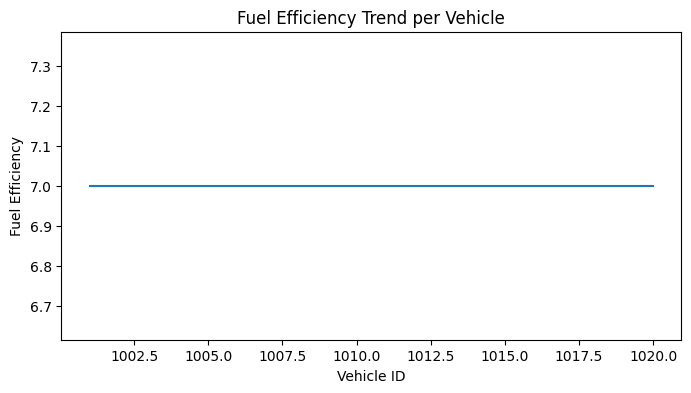

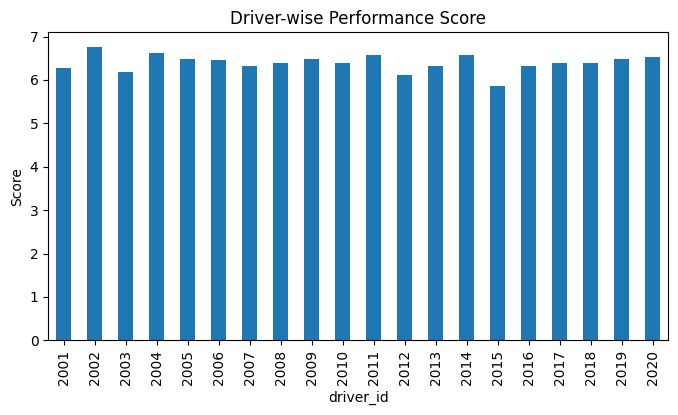

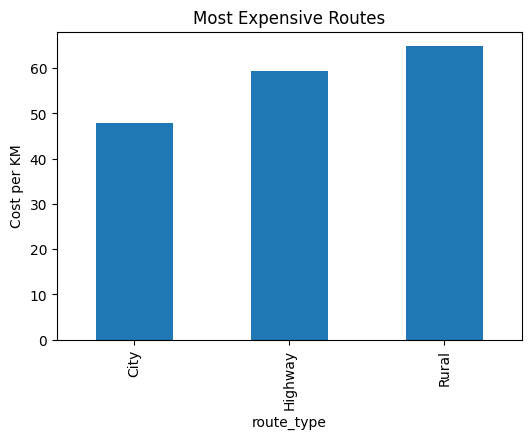

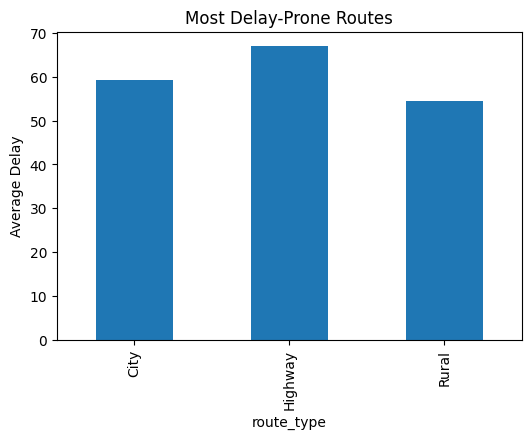

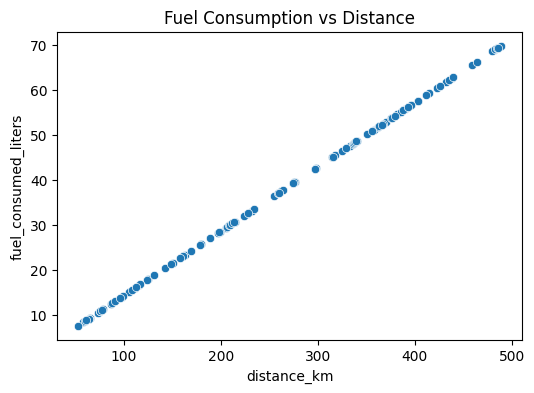

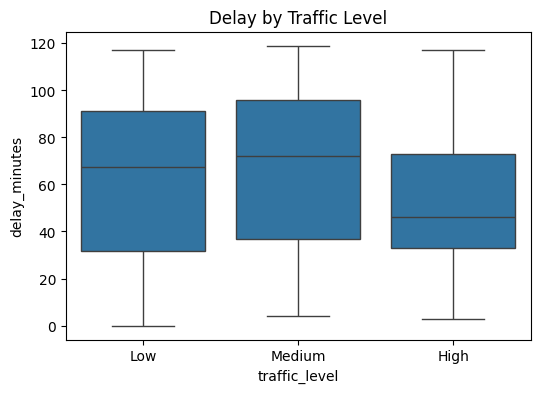

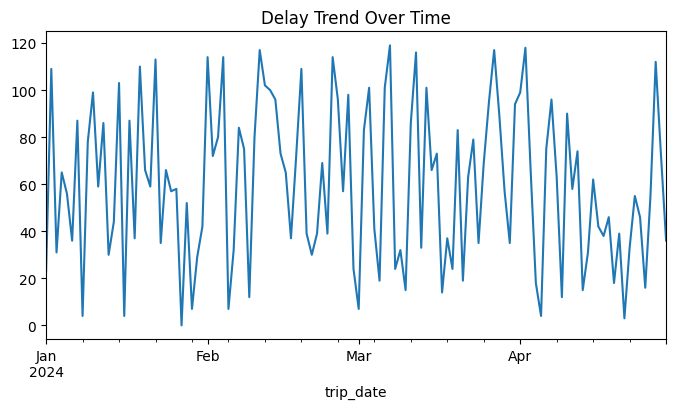

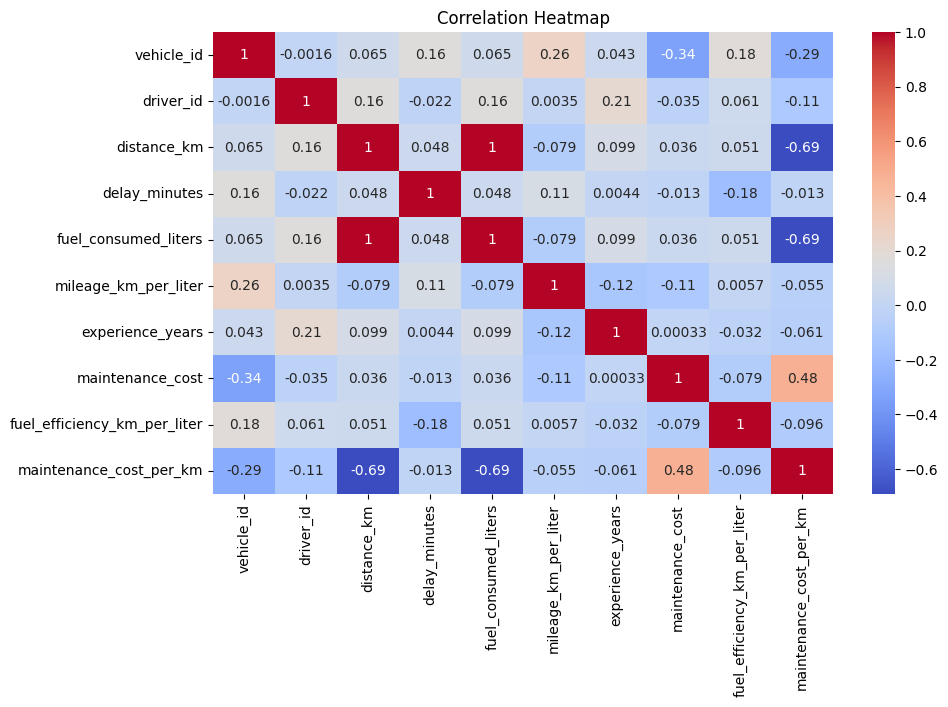

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
vehicle_eff = master.groupby("vehicle_id")["fuel_efficiency_km_per_liter"].mean()
plt.figure(figsize=(8,4))
vehicle_eff.plot(kind="line")
plt.title("Fuel Efficiency Trend per Vehicle")
plt.xlabel("Vehicle ID")
plt.ylabel("Fuel Efficiency")
plt.show()
driver_perf = master.groupby("driver_id")[["fuel_efficiency_km_per_liter","delay_minutes"]].mean()
driver_perf["performance_score"] = driver_perf["fuel_efficiency_km_per_liter"] - driver_perf["delay_minutes"]/100
plt.figure(figsize=(8,4))
driver_perf["performance_score"].plot(kind="bar")
plt.title("Driver-wise Performance Score")
plt.ylabel("Score")
plt.show()
route_cost = master.groupby("route_type")["maintenance_cost_per_km"].mean()
plt.figure(figsize=(6,4))
route_cost.plot(kind="bar")
plt.title("Most Expensive Routes")
plt.ylabel("Cost per KM")
plt.show()
route_delay = master.groupby("route_type")["delay_minutes"].mean()
plt.figure(figsize=(6,4))
route_delay.plot(kind="bar")
plt.title("Most Delay-Prone Routes")
plt.ylabel("Average Delay")
plt.show()
plt.figure(figsize=(6,4))
sns.scatterplot(x="distance_km", y="fuel_consumed_liters", data=master)
plt.title("Fuel Consumption vs Distance")
plt.show()
plt.figure(figsize=(6,4))
sns.boxplot(x="traffic_level", y="delay_minutes", data=master)
plt.title("Delay by Traffic Level")
plt.show()
plt.figure(figsize=(8,4))
master.groupby("trip_date")["delay_minutes"].mean().plot()
plt.title("Delay Trend Over Time")
plt.show()
plt.figure(figsize=(10,6))
sns.heatmap(master.select_dtypes(include=["int64","float64"]).corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

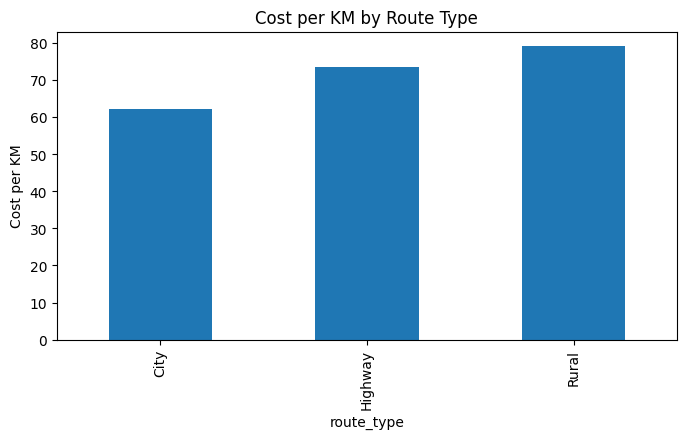

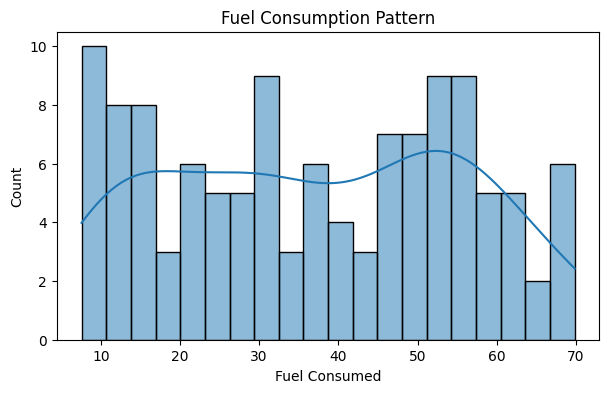

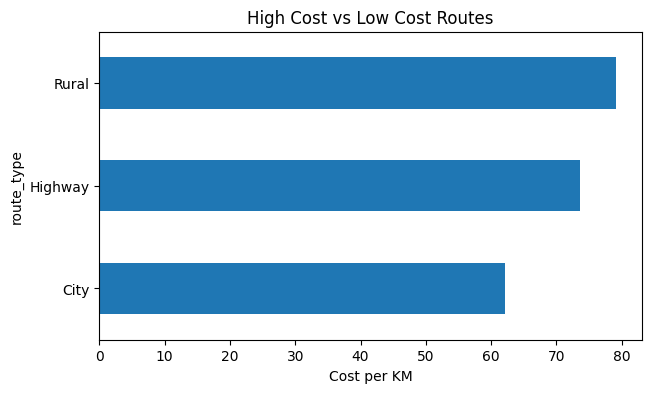

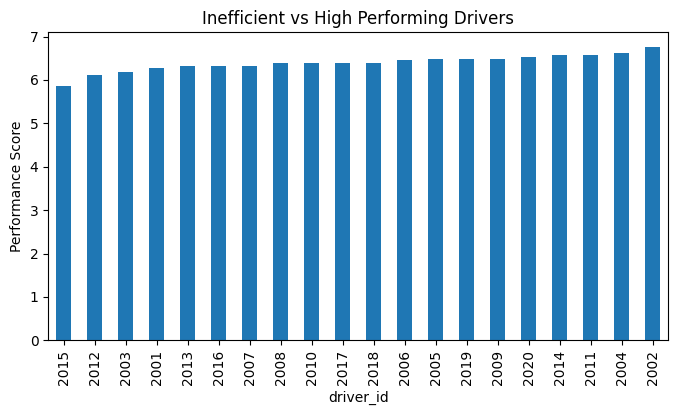

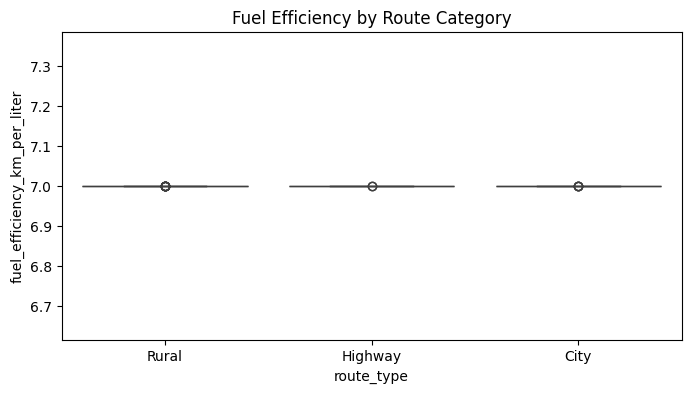

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

master["fuel_cost"] = master["fuel_consumed_liters"] * 100
master["total_trip_cost"] = master["fuel_cost"] + master["maintenance_cost"]
master["cost_per_km"] = master["total_trip_cost"] / master["distance_km"]

plt.figure(figsize=(8,4))
master.groupby("route_type")["cost_per_km"].mean().plot(kind="bar")
plt.title("Cost per KM by Route Type")
plt.ylabel("Cost per KM")
plt.show()

plt.figure(figsize=(7,4))
sns.histplot(master["fuel_consumed_liters"], bins=20, kde=True)
plt.title("Fuel Consumption Pattern")
plt.xlabel("Fuel Consumed")
plt.show()

plt.figure(figsize=(7,4))
master.groupby("route_type")["cost_per_km"].mean().sort_values().plot(kind="barh")
plt.title("High Cost vs Low Cost Routes")
plt.xlabel("Cost per KM")
plt.show()

driver_perf = master.groupby("driver_id")[["fuel_efficiency_km_per_liter","delay_minutes"]].mean()
driver_perf["score"] = driver_perf["fuel_efficiency_km_per_liter"] - driver_perf["delay_minutes"]/100

plt.figure(figsize=(8,4))
driver_perf["score"].sort_values().plot(kind="bar")
plt.title("Inefficient vs High Performing Drivers")
plt.ylabel("Performance Score")
plt.show()

plt.figure(figsize=(8,4))
sns.boxplot(x="route_type", y="fuel_efficiency_km_per_liter", data=master)
plt.title("Fuel Efficiency by Route Category")
plt.show()